Data Science Fundamentals: Python |
[Table of Contents](../index.ipynb)
- - - 
<!--NAVIGATION-->
Module 17. [Overview](./00_julia_overview.ipynb) | [Getting Started](./01_julia_started.ipynb) | **[Commands](./02_julia_commands.ipynb)** | [Package: Gadfly](./03_julia_gadfly.ipynb)

Hello World
---

In [22]:
println("hello world")

hello world


# Commands

Our approach is aimed at those who already have at least some knowledge of programming — perhaps experience with Python, MATLAB, R, C or similar

In particular, we assume you have some familiarity with fundamental programming concepts such as

- variables
- loops
- conditionals (if/else)

Simple Functions
---

In [24]:
# function to calculate the volume of a sphere
function sphere_vol(r)
    # julia allows Unicode names (in UTF-8 encoding)
    # so either "pi" or the symbol π can be used
    return 4/3*pi*r^3
end

sphere_vol (generic function with 1 method)

In [25]:
vol = sphere_vol(3)
# @printf allows number formatting but does not automatically append the \n to statements, see below
using Printf
@printf "volume = %0.3f\n" vol 

volume = 113.097


In [26]:
# functions can also be defined more succinctly
quadratic(a, sqr_term, b) = (-b + sqr_term) / 2a

# calculates x for 0 = a*x^2+b*x+c, arguments types can be defined in function definitions
function quadratic2(a::Float64, b::Float64, c::Float64)
    # unlike other languages 2a is equivalent to 2*a
    # a^2 is used instead of a**2 or pow(a,2)
    sqr_term = sqrt(b^2-4a*c)
    r1 = quadratic(a, sqr_term, b)
    r2 = quadratic(a, -sqr_term, b)
    # multiple values can be returned from a function using tuples
    # if the return keyword is omitted, the last term is returned
    r1, r2
end

quadratic2 (generic function with 1 method)

In [27]:
quad1, quad2 = quadratic2(2.0, -2.0, -12.0)
println("result 1: ", quad1)

result 1: 3.0


In [28]:
println("result 2: ", quad2)

result 2: -2.0


String Basics 
---

In [29]:
# strings are defined with double quotes
# like variables, strings can contain any unicode character
s1 = "The quick brown fox jumps over the lazy dog α,β,γ"
println(s1)

The quick brown fox jumps over the lazy dog α,β,γ


In [30]:
# chars are defined with single quotes
c1 = 'a'
println(c1)

a


In [31]:
# the ascii value of a char can be found with Int():
println(c1, " ascii value = ", Int(c1))

a ascii value = 97


In [32]:
println("Int('α') == ", Int('α'))

Int('α') == 945


In [34]:
# strings can be converted to upper case or lower case:
s1_caps = uppercase(s1)
s1_lower = lowercase(s1)
println(s1_caps, "\n", s1_lower)

# sub strings can be indexed like arrays:
# (show prints the raw value)
show(s1[11]); println()


# or sub strings can be created:
show(s1[1:10]); println()


# end is used for the end of the array or string
show(s1[end-10:end]); println()


# julia allows string Interpolation:
a = "welcome"
b = "julia"
println("$a to $b.")


# this can extend to evaluate statements:
println("1 + 2 = $(1 + 2)")


# strings can also be concatenated using the * operator
# using * instead of + isn't intuitive when you start with Julia,
# however people think it makes more sense
s2 = "this" * " and" * " that"
println(s2)


# as well as the string function
s3 = string("this", " and", " that")
println(s3)
#> this and that


THE QUICK BROWN FOX JUMPS OVER THE LAZY DOG Α,Β,Γ
the quick brown fox jumps over the lazy dog α,β,γ
'b'
"The quick "
"dog α,β,γ"
welcome to julia.
1 + 2 = 3
this and that
this and that


Example: Plotting a White Noise Process
---

To begin, let’s suppose that we want to simulate and plot the white noise process ε0,ε1,…,εTε0,ε1,…,εT, where each draw εtεt is independent standard normal

In other words, we want to generate figures that look something like this:

![caption](files/test_program_1.png)

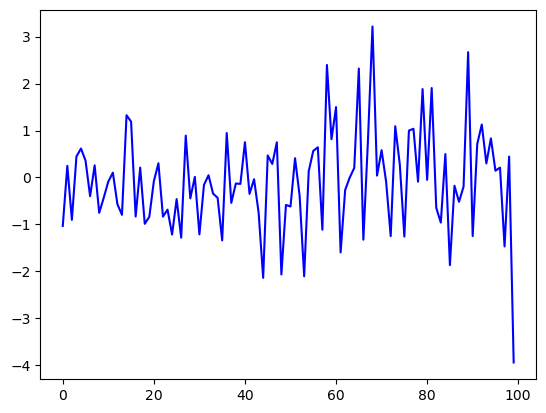

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb7adb0b410>

In [1]:
using PyPlot
ts_length = 100
epsilon_values = randn(ts_length)
plot(epsilon_values, "b-")

In brief,

using PyPlot makes the functionality in PyPlot available for use

In particular, it pulls the names exported by the PyPlot module into the global scope
One of these is plot(), which in turn calls the plot function from Matplotlib
randn() is a Julia function from the standard library for generating standard normals

Importing Functions
---

The effect of the statement ```using PyPlot``` is to make all the names exported by the PyPlot module available in the global scope

If you prefer to be more selective you can replace ```using PyPlot``` with ```import PyPlot: plot```

Now only the plot function is accessible

Since our program uses only the plot function from this module, either would have worked in the previous example

Arrays
---

The function call epsilon_values = randn(ts_length) creates one of the most fundamental Julia data types: an array

In [35]:
function printsum(a)
    # summary generates a summary of an object
    println(summary(a), ": ", repr(a))
end

# arrays can be initialised directly:
a1 = [1,2,3]
printsum(a1)


# or initialised empty:
a2 = []
printsum(a2)


# since this array has no type, functions like push! (see below) don't work
# instead arrays can be initialised with a type:
a3 = Int64[]
printsum(a3)


# ranges are different from arrays:
a4 = 1:20
printsum(a4)


# however they can be used to create arrays thus:
a4 = collect(1:20)
printsum(a4)


# arrays can also be generated from comprehensions:
a5 = [2^i for i = 1:10]
printsum(a5)


# arrays can be any type, so arrays of arrays can be created:
a6 = (Array{Int64, 1})[]
printsum(a6)


# (note this is a "jagged array" (i.e., an array of arrays), not a multidimensional array,
# these are not covered here)

# Julia provided a number of "Dequeue" functions, the most common
# for appending to the end of arrays is push!
# ! at the end of a function name indicates that the first argument is updated.

push!(a1, 4)
printsum(a1)


# push!(a2, 1) would cause error:

push!(a3, 1)
printsum(a3) #> 1-element Array{Int64,1}: [1]


push!(a6, [1,2,3])
printsum(a6)


# using repeat() to create arrays
# you must use the keywords "inner" and "outer"
# all arguments must be arrays (not ranges)
a7 = repeat(a1,inner=[2],outer=[1])
printsum(a7)

a8 = repeat(collect(4:-1:1),inner=[1],outer=[2])
printsum(a8)


3-element Array{Int64,1}: [1, 2, 3]
0-element Array{Any,1}: Any[]
0-element Array{Int64,1}: Int64[]
20-element UnitRange{Int64}: 1:20
20-element Array{Int64,1}: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
10-element Array{Int64,1}: [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
0-element Array{Array{Int64,1},1}: Array{Int64,1}[]
4-element Array{Int64,1}: [1, 2, 3, 4]
1-element Array{Int64,1}: [1]
1-element Array{Array{Int64,1},1}: [[1, 2, 3]]
8-element Array{Int64,1}: [1, 1, 2, 2, 3, 3, 4, 4]
8-element Array{Int64,1}: [4, 3, 2, 1, 4, 3, 2, 1]


The information from typeof() tells us that epsilon_values is an array of 64 bit floating point values, of dimension 1

Julia arrays are quite flexible — they can store heterogeneous data for example

In [4]:
x = [10, "foo", false]

3-element Array{Any,1}:
    10
      "foo"
 false

Notice now that the data type is recorded as Any, since the array contains mixed data

The first element of x is an integer

In [5]:
typeof(x[1])

Int64

The second is a string

In [6]:
typeof(x[2])

String

The third is the boolean value false

In [7]:
typeof(x[3])

Bool

Notice from the above that

- array indices start at 1 (unlike Python, where arrays are zero-based)
- array elements are referenced using square brackets (unlike MATLAB and Fortran)
- Julia contains many functions for acting on arrays — we’ll review them later

For now here’s several examples, applied to the same list x = [10, "foo", false]

The first example just returns the length of the list

The second, pop!(), pops the last element off the list and returns it

In doing so it changes the list (by dropping the last element)

Because of this we call pop! a mutating method

It’s conventional in Julia that mutating methods end in ! to remind the user that the function has other effects beyond just returning a value

The function push!() is similar, expect that it appends its second argument to the array

For Loops
---

Although there’s no need in terms of what we wanted to achieve with our program, for the sake of learning syntax let’s rewrite our program to use a for loop

In [13]:
# Julia program to illustrate 
# the use of For loop 

print("List Iteration\n") 
l = ["geeks", "for", "geeks"] 
for i in l 
	println(i) 
end 

# Iterating over a tuple (immutable) 
print("\nTuple Iteration\n") 
t = ("geeks", "for", "geeks") 
for i in t 
	println(i) 
end 

# Iterating over a String 
print("\nString Iteration\n")	 
s = "Geeks"
for i in s 
	println(i) 
end 

List Iteration
geeks
for
geeks

Tuple Iteration
geeks
for
geeks

String Iteration
G
e
e
k
s


In [14]:
# Julia program to illustrate 
# the use of Nested For-Loops 

# Outer For-loop 
for i in 1:5

	# Inner For-loop 
	for j in 1:i 
		
		# Print statement 
		print(i, " ") 
	end 
	println() 
end 


1 
2 2 
3 3 3 
4 4 4 4 
5 5 5 5 5 


Here we first declared ```epsilon_values``` to be an empty array for storing 64 bit floating point numbers

The for loop then populates this array by successive calls to randn()

Called without an argument, ```randn()``` returns a single float

Like all code blocks in Julia, the end of the for loop code block (which is just one line here) is indicated by the keyword ```end```

The word ```in``` from the for loop can be replaced by symbol ```=```

The expression ```1:ts_length``` creates an iterator that is looped over — in this case the integers from 1 to ts_length

Iterators are memory efficient because the elements are generated on the fly rather than stored in memory

In Julia you can also loop directly over arrays themselves, like so

In [8]:
words = ["foo", "bar"]
for word in words
    println("Hello $word")
end

Hello foo
Hello bar


User-Defined Functions
---

For the sake of the exercise, let’s now go back to the for loop but restructure our program so that generation of random variables takes place within a user-defined function

In [15]:
# Julia program to illustrate 
# the use of 'function' keyword 

# Defining a function 
function func() 
	println("this is a function") 
end 

# Function call 
func() 

this is a function


Here

- function is a Julia keyword that indicates the start of a function definition
- func is an arbitrary name for the function

Create a User-Defined Function to accept arguments. 

In [21]:
# Defining a function with arguments 
function add_fn(x, y) 
	println(x + y) 
end 

# Calling defined function 
add_fn(10, 8) 

18


More Useful Functions
---

Of course the function generate_data is completely contrived

We could just write the following and be done

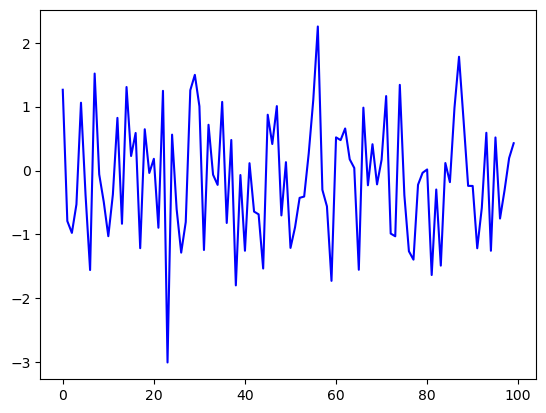

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb7ae9a1790>

In [16]:
ts_length = 100
data = randn(ts_length)
plot(data, "b-")

This function will be passed a choice of probability distribution and respond by plotting a histogram of observations

In doing so we’ll make use of the Distributions package

In [18]:
using Pkg

In [19]:
Pkg.add("Distributions")

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
  [31c24e10] + Distributions v0.23.4
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


┌ Info: Precompiling Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1260


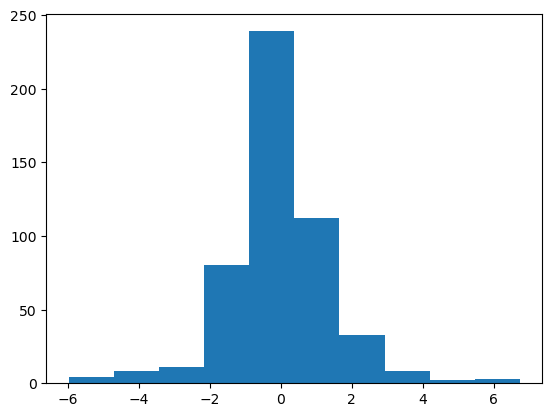

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = plot_histogram(::Laplace{Float64}, ::Int64) at In[20]:6
└ @ Main ./In[20]:6


([4.0, 8.0, 11.0, 80.0, 239.0, 112.0, 33.0, 8.0, 2.0, 3.0], [-5.96335515254708, -4.693263474138988, -3.4231717957308954, -2.153080117322803, -0.8829884389147109, 0.3871032394933813, 1.6571949179014736, 2.927286596309565, 4.197378274717658, 5.467469953125751, 6.7375616315338425], PyCall.PyObject[PyObject <matplotlib.patches.Rectangle object at 0x7fb7ac7a8990>, PyObject <matplotlib.patches.Rectangle object at 0x7fb7ac780390>, PyObject <matplotlib.patches.Rectangle object at 0x7fb7ac7a8e10>, PyObject <matplotlib.patches.Rectangle object at 0x7fb7ac7a8e50>, PyObject <matplotlib.patches.Rectangle object at 0x7fb7ac7b6210>, PyObject <matplotlib.patches.Rectangle object at 0x7fb7ac7b6dd0>, PyObject <matplotlib.patches.Rectangle object at 0x7fb7ac7b6d50>, PyObject <matplotlib.patches.Rectangle object at 0x7fb7ac7b6d90>, PyObject <matplotlib.patches.Rectangle object at 0x7fb7ac7b6850>, PyObject <matplotlib.patches.Rectangle object at 0x7fb7ac7b65d0>])

In [20]:
using PyPlot
using Distributions

function plot_histogram(distribution, n)
    epsilon_values = rand(distribution, n)  # n draws from distribution
    plt[:hist](epsilon_values)
end

lp = Laplace()
plot_histogram(lp, 500)

First, lp = Laplace() creates an instance of a data type defined in the Distributions module that represents the Laplace distribution

The name lp is bound to this object

When we make the function call plot_histogram(lp, 500) the code in the body of the function plot_histogram is run with

the name distribution bound to the same object as lp
the name n bound to the integer 500

How It Works
---

Consider the function call rand(distribution, n)

This looks like something of a mystery

The function rand() is defined in the base library such that rand(n) returns n uniform random variables on [0,1)

In [21]:
rand(3)

3-element Array{Float64,1}:
 0.760911
 0.480226
 0.910422

On the other hand, distribution points to a data type representing the Laplace distribution that has been defined in a third party package

So how can it be that rand() is able to take this kind of object as an argument and return the output that we want?

The answer in a nutshell is multiple dispatch

This refers to the idea that functions in Julia can have different behavior depending on the particular arguments that they’re passed

Hence in Julia we can take an existing function and give it a new behavior by defining how it acts on a new type of object

The interpreter knows which function definition to apply in a given setting by looking at the types of the objects the function is called on

In Julia these alternative versions of a function are called methods

Dataframes
---

In [ ]:
using DataFrames
showln(x) = (show(x); println())
# TODO: needs more links to docs.

# A DataFrame is an in-memory database
df = DataFrame(A = [1, 2], B = [ℯ, π], C = ["xx", "xy"])
showln(df)

# The columns of a DataFrame can be indexed using numbers or names
showln(df[!, 1])

showln(df[!, :A])

showln(df[!, 2])

showln(df[!, :B])

showln(df[!, 3])

showln(df[!, :C])


# The rows of a DataFrame can be indexed only by using numbers
showln(df[1, :])

showln(df[1:2, :])

In [37]:
import Pkg; Pkg.add("CSV")

  Resolving package versions...
  Installed WeakRefStrings ─ v0.6.2
  Installed FilePathsBase ── v0.8.0
  Installed CSV ──────────── v0.6.2
   Updating `~/.julia/environments/v1.4/Project.toml`
  [336ed68f] + CSV v0.6.2
   Updating `~/.julia/environments/v1.4/Manifest.toml`
  [336ed68f] + CSV v0.6.2
  [48062228] + FilePathsBase v0.8.0
  [ea10d353] + WeakRefStrings v0.6.2


Importing Dataframes
---

In [39]:
using CSV

# DataFrames can be loaded from CSV files using CSV.read()
iris = CSV.read("data/iris_csv.csv")

,sepallength,sepalwidth,petallength,petalwidth,class
,Float64,Float64,Float64,Float64,String
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


In [43]:
import Pkg; Pkg.add("RData")

  Resolving package versions...
  Installed Libiconv_jll ─────── v1.16.0+5
  Installed Mocking ──────────── v0.7.1
  Installed ExprTools ────────── v0.1.1
  Installed FileIO ───────────── v1.3.0
  Installed RData ────────────── v0.7.2
  Installed EzXML ────────────── v1.1.0
  Installed TranscodingStreams ─ v0.9.5
  Installed TimeZones ────────── v1.2.0
  Installed Zlib_jll ─────────── v1.2.11+14
  Installed CodecZlib ────────── v0.7.0
  Installed RecipesBase ──────── v1.0.1
  Installed XML2_jll ─────────── v2.9.10+1
######################################################################### 100.0%##O=#  #                                                                       
######################################################################### 100.0%##O#- #                                                                        
######################################################################### 100.0%##O#- #                                                                       

In [45]:
import Pkg; Pkg.add("RDatasets")

  Resolving package versions...
  Installed RDatasets ─ v0.6.9
   Updating `~/.julia/environments/v1.4/Project.toml`
  [ce6b1742] + RDatasets v0.6.9
   Updating `~/.julia/environments/v1.4/Manifest.toml`
  [ce6b1742] + RDatasets v0.6.9


In [46]:
# the iris dataset (and plenty of others) is also available from
using RData, RDatasets
iris2 = dataset("datasets","iris")

┌ Info: Precompiling RDatasets [ce6b1742-4840-55fa-b093-852dadbb1d8b]
└ @ Base loading.jl:1260


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


Showing Dataframes
---

In [41]:

# Subset the DataFrame to only include rows for one species
showln(iris[iris[!, :Species] .== "setosa", :])

# Count the number of rows for each species
showln(by(iris, :Species, df -> size(df, 1)))

# Discretize entire columns at a time
iris[!, :SepalLength] = round.(Integer, iris[!, :SepalLength])
iris[!, :SepalWidth] = round.(Integer, iris[!, :SepalWidth])


# Tabulate data according to discretized columns to see "clusters"
tabulated = by(
    iris,
    [:Species, :SepalLength, :SepalWidth],
    df -> size(df, 1)
)
showln(tabulated)


# you can setup a grouped dataframe like this
gdf = groupby(iris,[:Species, :SepalLength, :SepalWidth])

# and then iterate over it
for idf in gdf
    println(size(idf,1))
end

# Adding/Removing columns
# -----------------------

# insert!(df::DataFrame,index::Int64,item::AbstractArray{T,1},name::Symbol)
# insert random numbers at col 5:
insertcols!(iris, 5, :randCol => rand(nrow(iris)))

# remove it
select!(iris, Not(:randCol))

UndefVarError: UndefVarError: showln not defined

- - - 
<!--NAVIGATION-->
Module 17. [Overview](./00_julia_overview.ipynb) | [Getting Started](./01_julia_started.ipynb) | **[Commands](./02_julia_commands.ipynb)** | [Package: Gadfly](./03_julia_gadfly.ipynb)

- - -

Copyright © 2020 Qualex Consulting Services Incorporated.